In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas 


In [4]:
pip install scikit-learn --trusted-host files.pythonhosted.org --trusted-host pypi.org --trusted-host pypi.python.org

     | 12.1 MB 17.6 MB/s 0:00:000m
     \ 39.4 MB 28.0 MB/s 0:00:01
  Using cached threadpoolctl-3.5.0-py3-none-any.whl
     - 301.8 kB 64.7 MB/s 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
files = pandas.read_csv('Gold/prediction.csv')

actual_values = files["Note"]
predicted_values = files["prediction_numerique"]

actual_values.head(10)

0    5
1    5
2    5
3    5
4    5
5    3
6    5
7    5
8    5
9    3
Name: Note, dtype: int64

In [28]:
cnf_matrix = confusion_matrix(actual_values,predicted_values)

cnf_matrix

array([[  3,   0,   3,   0,   0],
       [  0,   9,   0,   0,   0],
       [  0,   7,   7,   2,   0],
       [  0,   6,   6,  40,  18],
       [  0,   8,  19, 111, 139]])

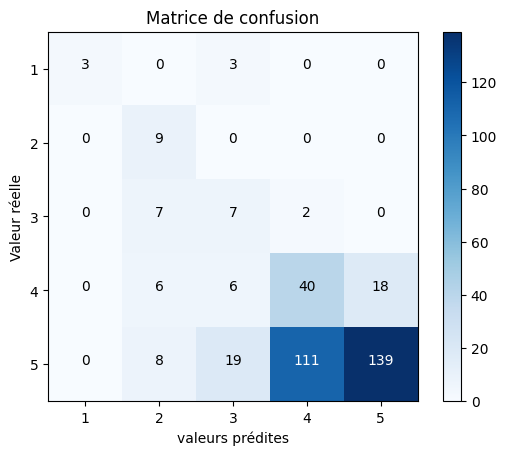

ValueError: too many values to unpack (expected 4)

In [30]:

classes = range(1,6)
plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Valeur réelle')
plt.xlabel('valeurs prédites')
plt.show()


tn, fp, fn ,tp = confusion_matrix(actual_values,predicted_values).reshape(-1)
print('Valeurs de TN, FP, FN, TP : \n',tn, fp, fn, tp)

In [31]:
matrix = classification_report(actual_values,predicted_values)
print('Rapport de Classification  :s \n',matrix)

Rapport de Classification  : 
               precision    recall  f1-score   support

           1       1.00      0.50      0.67         6
           2       0.30      1.00      0.46         9
           3       0.20      0.44      0.27        16
           4       0.26      0.57      0.36        70
           5       0.89      0.50      0.64       277

    accuracy                           0.52       378
   macro avg       0.53      0.60      0.48       378
weighted avg       0.73      0.52      0.57       378

